# Libs

In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.datasets.mnist as mnist


# Data

In [2]:
(x_train_2d, y_train), (x_test_2d, y_test) = mnist.load_data()
x_train_2d = x_train_2d/255.0
x_test_2d = x_test_2d/255.0


print ('train: data shape', x_train_2d.shape, 'label shape', y_train.shape)
print ('test: data shape', x_test_2d.shape, 'label shape', y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
train: data shape (60000, 28, 28) label shape (60000,)
test: data shape (10000, 28, 28) label shape (10000,)


In [3]:
x_train = x_train_2d[..., np.newaxis]
x_test = x_test_2d[..., np.newaxis]

# Simple CNN

In [4]:
x = tf.keras.layers.Input(shape=(28, 28, 1))

l1 = tf.keras.layers.Conv2D(16, 3, name = 'C1', kernel_initializer='he_uniform', activation='relu')(x)
l2 = tf.keras.layers.Conv2D(32, 3, strides=2, name = 'C2', kernel_initializer='he_uniform', activation='relu')(l1)
l3 = tf.keras.layers.Conv2D(64, 3, strides=2, name = 'C3', kernel_initializer='he_uniform', activation='relu')(l2)

l3_f = tf.keras.layers.Flatten()(l3)

l4 = tf.keras.layers.Dense(units=32, name='l4', activation='relu')(l3_f)
l5 = tf.keras.layers.Dense(units=10, name='l5', activation='softmax')(l4)

In [5]:
model = tf.keras.Model(x, l5)

In [6]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 C1 (Conv2D)                 (None, 26, 26, 16)        160       
                                                                 
 C2 (Conv2D)                 (None, 12, 12, 32)        4640      
                                                                 
 C3 (Conv2D)                 (None, 5, 5, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 l4 (Dense)                  (None, 32)                51232     
                                                                 
 l5 (Dense)                  (None, 10)                330   

In [8]:
hist = model.fit(x=x_train, y=y_train,
                 epochs=10, batch_size=64,
                 validation_data=(x_test, y_test), 
                 )

Epoch 1/10
938/938 [==============================] - 14s 5ms/step - loss: 0.1395 - accuracy: 0.9571 - val_loss: 0.0659 - val_accuracy: 0.9791
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0550 - accuracy: 0.9833 - val_loss: 0.0610 - val_accuracy: 0.9794
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0452 - accuracy: 0.9862 - val_loss: 0.0572 - val_accuracy: 0.9824
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0369 - accuracy: 0.9888 - val_loss: 0.0564 - val_accuracy: 0.9826
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0330 - accuracy: 0.9895 - val_loss: 0.0593 - val_accuracy: 0.9840
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0289 - accuracy: 0.9908 - val_loss: 0.0500 - val_accuracy: 0.9859
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0263 - accuracy: 0.9918 - val_loss: 0.0666 - val_accuracy: 0.9847
Epoch

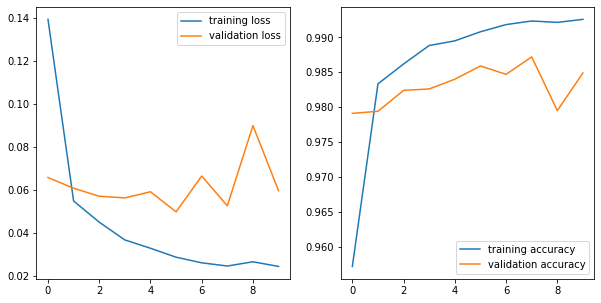

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='upper right')
axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()

# Simple CNN, with global AP

In [31]:
x = tf.keras.layers.Input(shape=(28, 28, 1))

l1 = tf.keras.layers.Conv2D(16, 3, name = 'C1', kernel_initializer='he_uniform', activation='relu')(x)
l2 = tf.keras.layers.Conv2D(32, 3, strides=2, name = 'C2', kernel_initializer='he_uniform', activation='relu')(l1)
l3 = tf.keras.layers.Conv2D(64, 3, strides=2, name = 'C3', kernel_initializer='he_uniform', activation='relu')(l2)


In [32]:
l3_pooled = tf.keras.layers.GlobalAveragePooling2D()(l3)

In [33]:
l3_pooled

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'global_average_pooling2d_2')>

In [34]:
l4 = tf.keras.layers.Dense(units=32, name='l4', activation='relu')(l3_pooled)
l5 = tf.keras.layers.Dense(units=10, name='l5', activation='softmax')(l4)

In [35]:
model_ap = tf.keras.Model(x, l5)

In [36]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
model_ap.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
model_ap.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 C1 (Conv2D)                 (None, 26, 26, 16)        160       
                                                                 
 C2 (Conv2D)                 (None, 12, 12, 32)        4640      
                                                                 
 C3 (Conv2D)                 (None, 5, 5, 64)          18496     
                                                                 
 global_average_pooling2d_2   (None, 64)               0         
 (GlobalAveragePooling2D)                                        
                                                                 
 l4 (Dense)                  (None, 32)                2080      
                                                           

In [38]:
hist = model_ap.fit(x=x_train, y=y_train,
                 epochs=30, batch_size=64,
                 validation_data=(x_test, y_test), 
                 )

Epoch 1/30
938/938 [==============================] - 6s 6ms/step - loss: 0.5691 - accuracy: 0.8160 - val_loss: 0.2266 - val_accuracy: 0.9367
Epoch 2/30
938/938 [==============================] - 5s 5ms/step - loss: 0.1926 - accuracy: 0.9420 - val_loss: 0.1765 - val_accuracy: 0.9502
Epoch 3/30
938/938 [==============================] - 5s 5ms/step - loss: 0.1397 - accuracy: 0.9580 - val_loss: 0.1103 - val_accuracy: 0.9659
Epoch 4/30
938/938 [==============================] - 5s 5ms/step - loss: 0.1142 - accuracy: 0.9652 - val_loss: 0.1077 - val_accuracy: 0.9672
Epoch 5/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0980 - accuracy: 0.9691 - val_loss: 0.0915 - val_accuracy: 0.9734
Epoch 6/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0862 - accuracy: 0.9736 - val_loss: 0.1016 - val_accuracy: 0.9661
Epoch 7/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0750 - accuracy: 0.9768 - val_loss: 0.1158 - val_accuracy: 0.9637
Epoch 

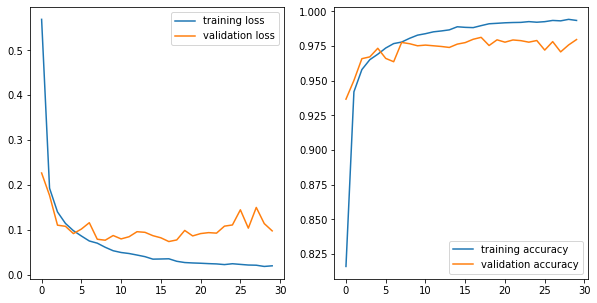

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='upper right')
axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()